In [59]:
# set plots inline for ipython
%matplotlib inline

# import system & ipython utils
import os
import subprocess
from IPython.display import Image
from IPython.display import HTML

# numpy and visualization libs
import pandas as pd
import numpy as np
import seaborn as sns

# import data preprocessing & ML libs
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# set random seed
seed = 32

In [64]:
#set paths to datasets
train_data = 'train_data.txt'
test_data = 'test_data.txt' # entirely disjoint set of subjects

# move to data path relative to the .ipnyb base dir
if os.getcwd().split('/')[-1] != 'pd_msr_data':
    os.chdir('./pd_msr_data')

# set dataset column labels
columns = ['subj_id', 'jitter_local', 'jitter_absolute', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp',
        'shimmer_local', 'shimmer_dB', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11', 'shimmer_dda',
        'AC', 'NTH', 'HTN', 'median_pitch', 'mean_pitch', 'standard_dev', 'min_pitch', 'max_pitch',
        'num_pulses', 'num_periods', 'mean_period', 'standard_dev_period', 'fraction_locally_unvoiced_frames',
        'num_voice_breaks', 'deg_voice_breaks','UPDRS','pd']
    
df = pd.read_csv(train_data)
df.columns = columns

# compute mean and standard deviation of features across subjects

# split data into train and test sets
X = df.drop(['subj_id','UPDRS','pd'], axis=1)
y = df['pd']
updrs = df['UPDRS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

[(0.7, 0.85)]

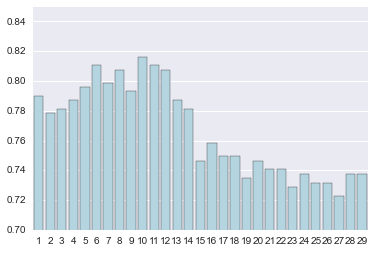

In [39]:
# run KNN for different values of n
k_range = range(1,30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

knn_bp = sns.barplot(k_range,scores,color='lightblue')
knn_bp.set(ylim=(.7,.85))


0.603498542274


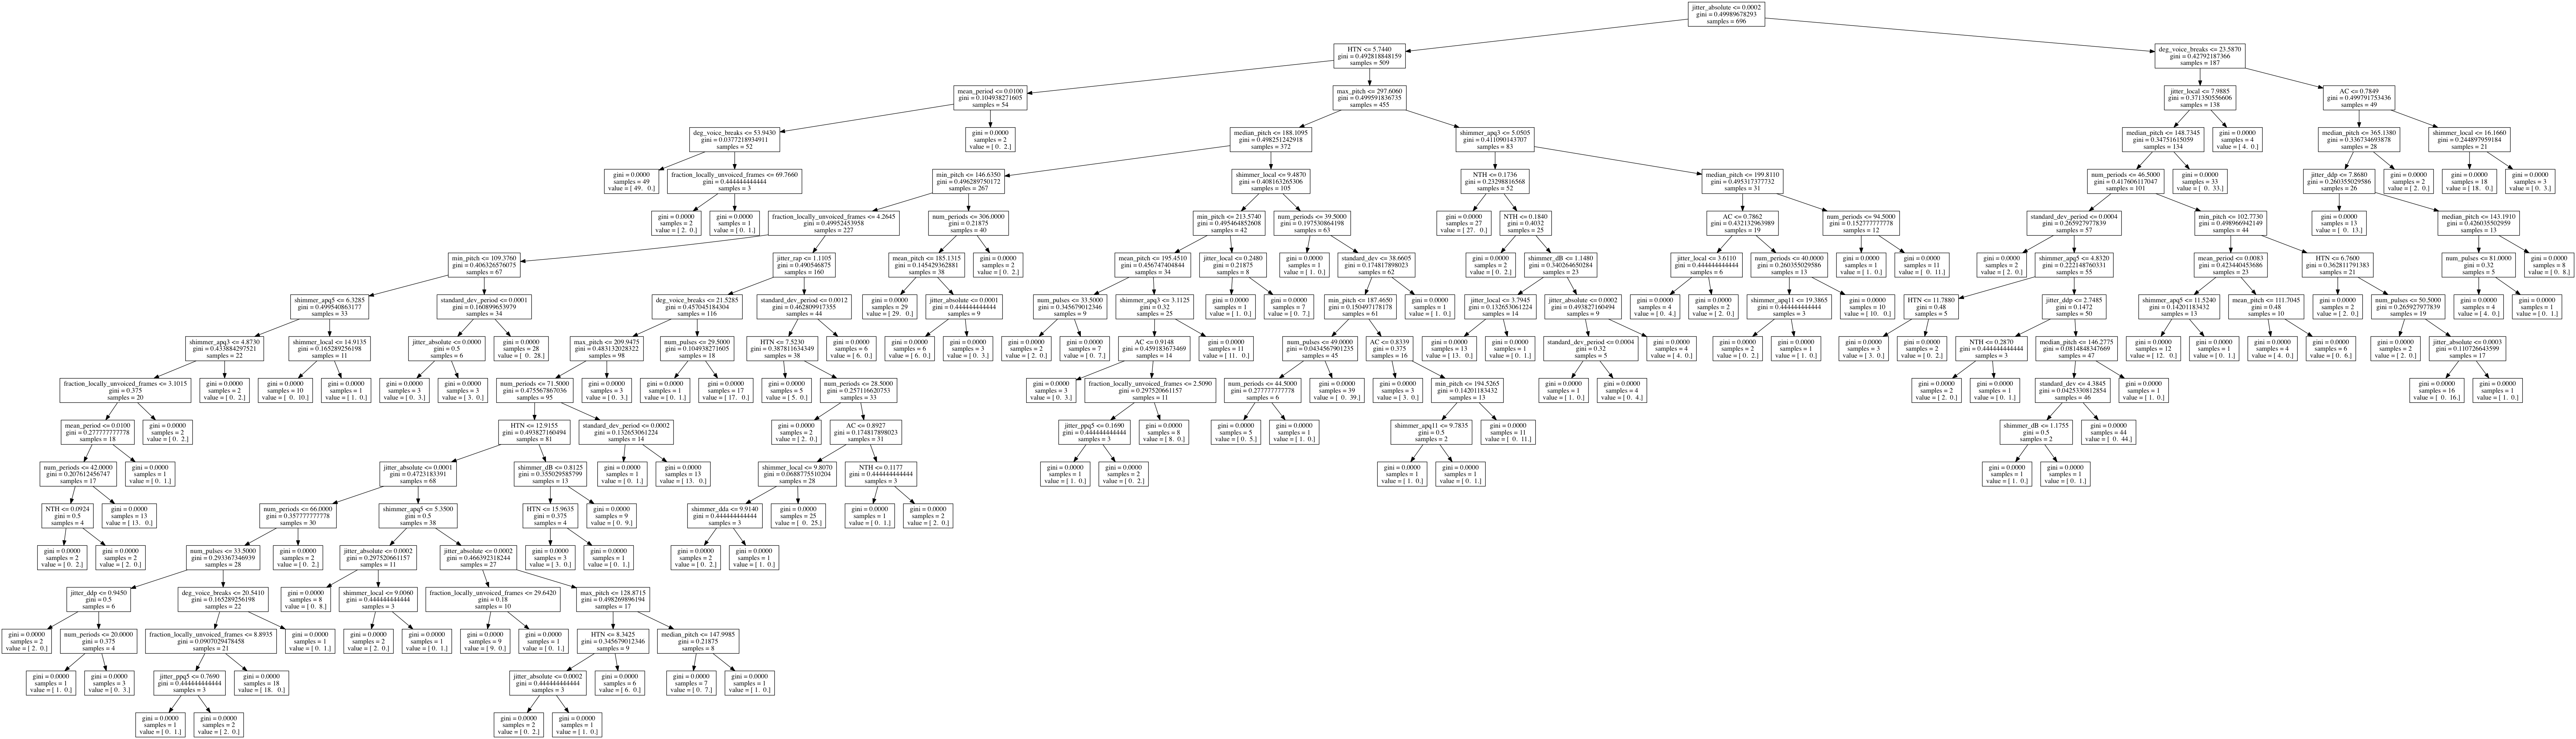

In [71]:
# run decisionTree
decisionTree = DecisionTreeClassifier(random_state=seed)
decisionTree.fit(X_train, y_train)
print decisionTree.score(X_test, y_test)

with open('tree.dot', 'w') as dotfile:
    export_graphviz(
        decisionTree,
        dotfile,
        feature_names=X_train.columns)
    
subprocess.call(['dot','-Tpng','tree.dot','-o','tree.png'])
Image(filename='tree.png')

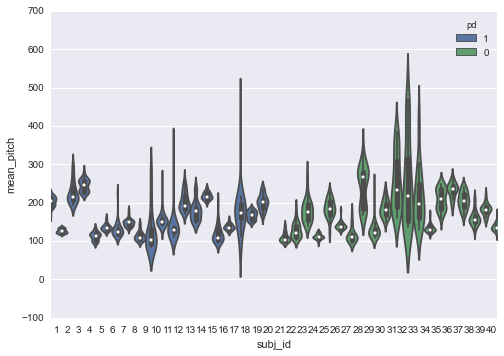

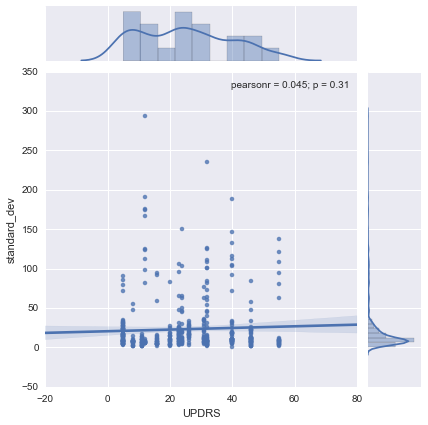

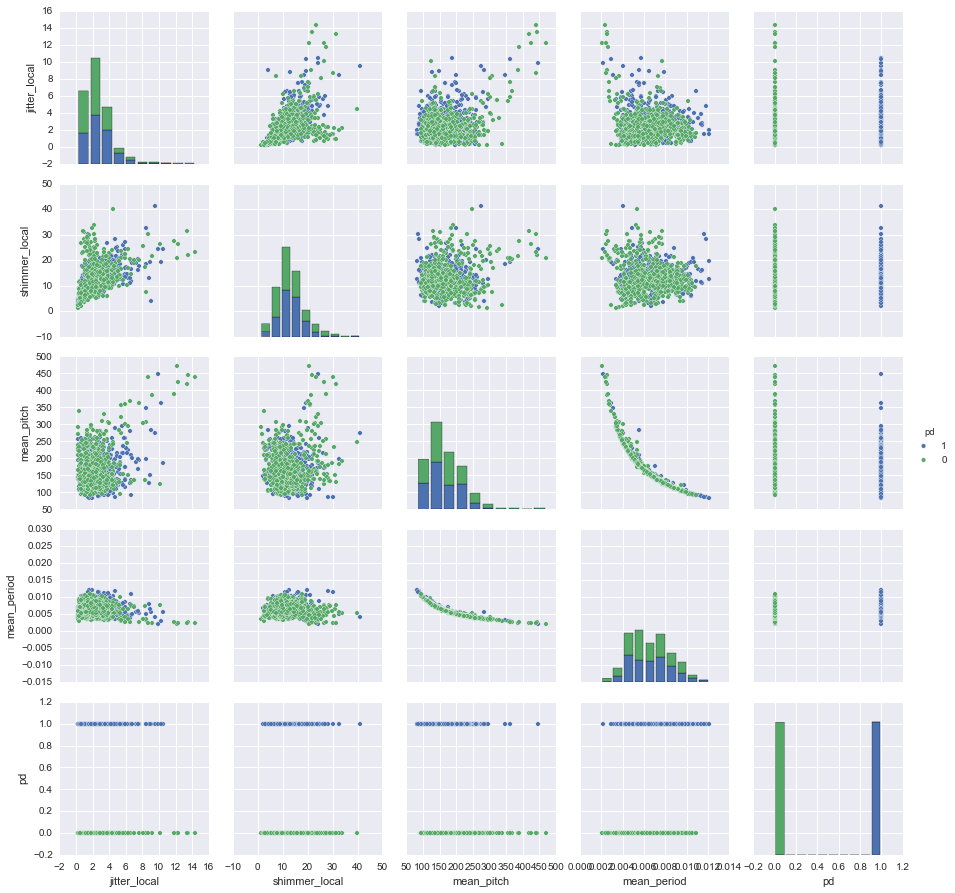

In [127]:
# exploritory / descriptive visualizaitons
sns.violinplot('subj_id','mean_pitch',data=df, hue='pd', width=2., size=10)
sns.jointplot('UPDRS','standard_dev',data=df[df.pd==1], kind='reg')
sns.pairplot(df[['jitter_local','shimmer_local','mean_pitch','mean_period','pd']], hue='pd')